In [889]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn import preprocessing


In [890]:
dfr=pd.read_csv('tempSiteRatings.csv')
dfd=pd.read_csv('tempUrlMetrics.csv')

In [891]:
dfd['rating']=dfr['rating']
dfd.to_csv('data.csv')

In [892]:
data=pd.read_csv('data.csv')
#data

In [893]:
data.drop(['Unnamed: 0'],1, inplace=True)
def dropMetrics(data):
    data.drop(['slno','url','p1','p2','p4','p6','p7','p10','p11','p12','p13'],1, inplace=True)
    return data

In [894]:
def transDF(data):
    x = data.values #returns a numpy array
    columns=data.columns
    scaler = preprocessing.StandardScaler()
    x_scaled = scaler.fit_transform(x)
    data=pd.DataFrame(x_scaled,columns=columns)
    return data

In [895]:
data=dropMetrics(data)
rating=data['rating']
data=transDF(data)
data['rating']=rating
data

p3        p5        p8        p9       p13    rating
0  -0.036745 -0.548604  0.326713 -0.812482 -0.966262  4.920000
1  -0.611304  0.381592  0.729960  0.286160  1.417207  5.000000
2   7.164690  0.838531  1.019429 -0.103681  2.712409  3.600000
3  -0.856765  1.001723 -0.728357 -0.788855  0.848130  2.840000
4  -0.630360  0.495827 -0.616105  0.061706 -0.118191  3.520000
5  -0.264509 -0.303816  1.062106 -0.623468  0.336331  4.160000
6  -0.553069 -0.369093  0.835051 -0.375388  0.622717  4.440000
7  -0.787654  0.055208  0.614730 -0.706162 -0.981043  4.880000
8  -0.726581  0.446869  0.486790  7.527744 -0.910833  5.120000
9   1.255721 -0.646520 -1.376622 -0.469895 -0.554236  5.480000
10  0.801490 -0.564923  1.029401 -0.765229 -0.860946  5.000000
11 -0.287645  3.873909  0.034602  0.498800  0.713252  3.583333
12 -0.496339 -0.581243  0.976880 -0.989682 -0.622599  2.750000
13 -0.546600 -0.450689  0.121053  0.699627 -1.204609  4.083333
14  0.193719 -0.385412  1.071527 -0.517148  0.016688  3.875000
15 -0.324627 -0.205900  0.061765 -0.399015 -0.703896  4.583333
16 -0.451271 -0.271177 -0.000578 -0.458082  0.515553  4.875000
17 -0.577592  0.104165  0.438132  0.286160 -0.868337  5.291667
18  1.070641 -0.548604 -0.108222 -0.399015  0.922036  5.416667
19 -0.790521 -0.401731  1.021483 -0.540775 -1.278515  6.541667
20 -0.961603 -0.646520  0.252577  0.286160  1.051372  5.416667
21 -0.351076 -0.646520 -0.364341 -1.025122 -1.873458  2.083333
22  0.184126  1.034362  0.566299 -0.647095 -0.934852  3.250000
23 -0.510736 -0.091665 -0.211350 -0.150934 -0.840622  3.750000
24 -0.088269  0.136804 -0.694201  0.227093 -0.099714  3.916667
25  0.005527 -0.613881  0.852736 -0.493522 -0.927461  4.583333
26 -0.394004  0.675339 -1.320970 -0.351761 -0.984739  5.291667
27  1.538783 -0.646520  1.004934 -0.316321  0.062879  5.166667
28 -0.593904 -0.254858  0.393804 -0.103681 -0.036894  4.833333
29 -0.244234 -0.320135  0.358026  0.699627 -0.539455  5.041667
..       ...       ...       ...       ...       ...       ...
64 -0.410221 -0.581243  1.018953 -0.280881  0.777920  4.916667
65  1.820709  5.701663 -0.816711 -0.576215  0.977466  5.291667
66 -0.427757 -0.271177  0.413113 -0.103681  0.033317  4.625000
67 -0.436983  1.246512 -0.028178  0.333413 -0.461854  4.750000
68 -0.022440 -0.597562 -3.449977  0.120773  0.404694  4.625000
69  0.097863 -0.238539  0.853866 -0.127308  0.637498  4.583333
70 -0.513561  1.752408 -0.164758  1.219414  0.691080  3.833333
71 -0.200842  2.927393  0.257737 -0.564402 -0.190249  2.625000
72 -0.261577 -0.059027 -0.199946  1.845522  0.537725  4.500000
73 -0.347937  0.136804 -0.523383  0.498800  0.210691  4.541667
74 -0.355146 -0.156942  0.332400  0.770507  0.107223  4.708333
75  0.954696 -0.303816 -0.352952 -0.162748 -0.210573  6.250000
76 -0.429998 -0.010069 -1.492405 -0.056428 -0.410119  5.875000
77  0.039414 -0.271177 -0.558358 -0.233628 -0.162534  3.666667
78 -0.358316  0.299996 -2.118943  0.321600 -1.500233  3.333333
79 -0.270396 -0.352773 -0.864816  0.605120  0.437952  3.416667
80  1.091378 -0.515966  0.582773 -0.741602  0.421323  3.958333
81 -0.565184 -0.467008  0.898547 -0.080054 -0.025808  5.375000
82 -0.505242 -0.418050 -0.713142 -0.647095  0.301226  4.500000
83  0.291030 -0.434369 -0.917524  0.014453  0.323398  4.958333
84  0.229425 -0.467008 -2.040516  0.014453 -2.152453  5.708333
85 -0.379435 -0.010069 -0.790082  1.172161 -0.971805  4.833333
86 -0.186411  2.062474  0.842714 -0.363575 -0.402729  3.666667
87  0.518429 -0.613881 -0.929188  0.026266 -0.168077  3.541667
88  0.279360 -0.467008  0.479148 -0.162748  0.343722  4.000000
89 -0.697350 -0.467008 -0.147953 -0.174561  0.766834  3.000000
90  0.625316  1.311789  0.675797  0.794134  0.535877  5.125000
91  0.055155  0.332635 -0.663680  2.140856  0.487839  5.416667
92 -0.504851 -0.597562  0.620628  0.203466  1.391339  5.166667
93  0.446070 -0.597562  0.757710  0.108959  1.492960  5.333333

[94 rows x 6 columns]

In [896]:
correlation = data.corr(method='pearson')
columns = correlation.nlargest(13,'rating').index
columns
#np.sort(columns)

Index(['rating', 'p9', 'p3', 'p13', 'p8', 'p5'], dtype='object')

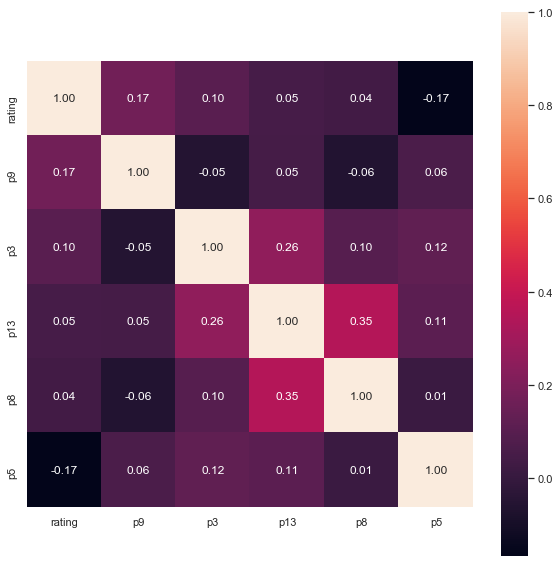

In [897]:
fig, ax = plt.subplots(figsize=(10,10))    
correlation_map = np.corrcoef(data[columns].values.T)
sns.set(font_scale=1)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f',yticklabels=columns.values, xticklabels=columns.values)
plt.savefig('corr.png')
#plt.show()


In [898]:
data['bias']=np.ones(data[data.columns[0]].shape)
Y=data['rating'].values
X_temp=data[columns]
X_temp.drop(['rating'],1, inplace=True)
X=X_temp.values

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [899]:
data_dmatrix= xgb.DMatrix(data=X,label=Y)

In [900]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle='True',test_size=0.5, random_state=1)

In [901]:
def LinearReg():
    from sklearn.linear_model import LinearRegression
    reg =LinearRegression()
    return reg
def RidgeReg():
    from sklearn.linear_model import Ridge
    reg =Ridge()
    return reg
def ABReg():
    from sklearn.ensemble import AdaBoostRegressor
    reg=AdaBoostRegressor(random_state=0, n_estimators=100)
    return reg
def DTReg():
    from sklearn.tree import DecisionTreeRegressor
    reg=DecisionTreeRegressor(random_state=0)
    return reg
def MLPReg():
    from sklearn.neural_network import MLPRegressor
    reg=MLPRegressor(hidden_layer_sizes=(4,),activation='logistic',solver='adam', max_iter=10000,batch_size=10,)
    return reg
def LogReg():
    from sklearn.linear_model import LogisticRegression
    reg=LogisticRegression()
    return reg
def XGBReg():
    reg=xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
    return reg
def RMS_test(reg):
    from sklearn.metrics import mean_squared_error
    Y_pred=reg.predict(X_test)
    return mean_squared_error(Y_test, Y_pred)
def RMS_train(reg):
    from sklearn.metrics import mean_squared_error
    Y_pred=reg.predict(X_train)
    return mean_squared_error(Y_train, Y_pred)


In [902]:
regLinear=LinearReg()
regLinear.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [903]:
regRidge=RidgeReg()
regRidge.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [904]:
regAB=ABReg()
regAB.fit(X_train,Y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=0)

In [905]:
regDT=DTReg()
regDT.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [906]:
regMLP=MLPReg()
regMLP.fit(X_train,Y_train)

MLPRegressor(activation='logistic', alpha=0.0001, batch_size=10, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [907]:
regXGB=XGBReg()
regXGB.fit(X_train,Y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [908]:
test=[RMS_test(regLinear),RMS_test(regRidge),RMS_test(regAB),RMS_test(regDT),RMS_test(regMLP),RMS_test(regXGB)]
train=[RMS_train(regLinear),RMS_train(regRidge),RMS_train(regAB),RMS_train(regDT),RMS_train(regMLP),RMS_train(regXGB)]


In [909]:
for i in zip(test,train):
    print(i)

(0.9999371395969436, 0.6374436046188123)
(0.965533975229171, 0.6377196442365916)
(0.8394129321689702, 0.10364467919565884)
(1.6265325650118203, 0.0)
(0.6777976662972945, 0.5783503554467608)
(2.495934360061072, 2.669947965452066)


In [910]:
for i in zip(test,train):
    print(i)

(0.9999371395969436, 0.6374436046188123)
(0.965533975229171, 0.6377196442365916)
(0.8394129321689702, 0.10364467919565884)
(1.6265325650118203, 0.0)
(0.6777976662972945, 0.5783503554467608)
(2.495934360061072, 2.669947965452066)


In [911]:
regLinear.coef_

array([ 0.22872918,  0.47200138,  0.08052402, -0.0114207 , -0.2900206 ])

In [912]:
columns

Index(['rating', 'p9', 'p3', 'p13', 'p8', 'p5'], dtype='object')

In [913]:
df={}
for year in range(2000,2020):
    df[str(year)]=pd.read_csv('yearMetrics/tempMpUrlMetrics'+str(year)+'.csv')
    df[str(year)]=dropMetrics(df[str(year)])
    df[str(year)]=transDF(df[str(year)])

In [914]:
columns[1:]

Index(['p9', 'p3', 'p13', 'p8', 'p5'], dtype='object')

In [915]:
meanYears=np.zeros(20)
stdYears=np.zeros(20)
for year in range(2000,2020):
    meanYears[year-2000]=np.mean(regMLP.predict(df[str(year)][columns[1:]].values))
    stdYears[year-2000]=np.std(regMLP.predict(df[str(year)][columns[1:]].values))

In [916]:
meanYears,stdYears

(array([4.43022735, 4.45417022, 4.47243634, 4.45414192, 4.46262255,
        4.46394989, 4.45377086, 4.44094273, 4.43421105, 4.44620204,
        4.43395924, 4.44490601, 4.43700642, 4.43706831, 4.43370428,
        4.4184251 , 4.42165817, 4.41368443, 4.40845194, 4.43419172]),
 array([0.41994003, 0.37384255, 0.33003571, 0.3912512 , 0.36718028,
        0.35167447, 0.36353843, 0.43538249, 0.42644143, 0.389014  ,
        0.41549752, 0.45150199, 0.43519287, 0.41481281, 0.43905008,
        0.48841853, 0.51091397, 0.51010877, 0.51738537, 0.48757659]))

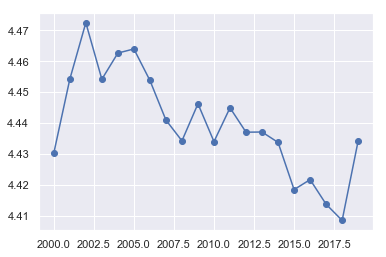

In [917]:
x=range(2000,2020)
y=meanYears
e=stdYears*0
plt.errorbar(x, y, e, fmt='-o')
plt.show()